In [1]:
import pandas as pd
import geopandas as gpd

gdf = gpd.read_file("database_germany_all/industrial_landuse_labeled_filtered_geo_json_files.gpkg")

# Get unique labels and their counts
label_counts = gdf['label'].value_counts()
label_counts

label
Abwasserbehandlungsanlage                                                                                      2086
Gasspeicheranlage                                                                                              1618
Biomassekraftwerk                                                                                              1132
Logistikzentrum                                                                                                 888
Solarkraftwerk                                                                                                  754
                                                                                                               ... 
Kernkraftwerk                                                                                                     1
Zuckerwerk                                                                                                        1
Zuckerraffinerie is not in the list, so None                      

In [2]:
from services.llm_model import load_data_to_df_with_tags

df = load_data_to_df_with_tags(
    dataset_path="/Users/lukasflaig/PycharmProjects/OSMData/data/dataset_germany",
    selected_labels=["Abwasserbehandlungsanlage", "Gasspeicheranlage", "Biomassekraftwerk"],
    limit_per_class=330,
    gpkg_path="/Users/lukasflaig/PycharmProjects/OSMData/database_germany_all/industrial_landuse_labeled_filtered.gpkg"
)

Verwendete Klassen: ['Abwasserbehandlungsanlage', 'Gasspeicheranlage', 'Biomassekraftwerk']
Erstelltes DataFrame mit 990 Einträgen.


In [3]:
df.head()

,path,id,ground_truth,tags
0,/Users/lukasflaig/PycharmProjects/OSMData/data...,41681536,Abwasserbehandlungsanlage,"{'landuse': 'industrial', 'man_made': 'wastewa..."
1,/Users/lukasflaig/PycharmProjects/OSMData/data...,1092690874,Gasspeicheranlage,"{'industrial': 'gas', 'landuse': 'industrial',..."
2,/Users/lukasflaig/PycharmProjects/OSMData/data...,1080826945,Gasspeicheranlage,"{'abandoned': 'yes', 'industrial': 'oil_storag..."
3,/Users/lukasflaig/PycharmProjects/OSMData/data...,388225524,Abwasserbehandlungsanlage,"{'barrier': 'fence', 'landuse': 'industrial', ..."
4,/Users/lukasflaig/PycharmProjects/OSMData/data...,105283112,Abwasserbehandlungsanlage,"{'barrier': 'fence', 'landuse': 'industrial', ..."


In [4]:
from services.llama_client import Llama32Client

# Initialisiere den LLM Client
client = Llama32Client()

In [5]:
from services.llm_model import classify_osm_ways

df = classify_osm_ways(df, batch_size=10, max_retries=2, retry_delay=5, fixed_labels=["Abwasserbehandlungsanlage", "Gasspeicheranlage", "Biomassekraftwerk"], client=client)

[INFO] Total rows: 990
[INFO] Processing in 99 batches of up to 10 rows each.



Processing Batches:   1%|          | 1/99 [00:08<14:40,  8.99s/batch]

[INFO] OSM ID 41681536 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1092690874 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1080826945 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 388225524 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 105283112 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1148284950 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 578202033 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 738216876 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 451976240 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 75881715 classified as 'Gasspeicheranlage'.


Processing Batches:   2%|▏         | 2/99 [00:17<13:45,  8.51s/batch]

[INFO] OSM ID 1298340241 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 639472779 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 492739024 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 454552198 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 192741812 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 495654813 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1233282029 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 26392574 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 27396560 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 524645741 classified as 'Biomassekraftwerk'.


Processing Batches:   3%|▎         | 3/99 [00:26<14:00,  8.76s/batch]

[INFO] OSM ID 1208139161 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 96002455 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 120163528 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1236108667 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1237621746 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 195276899 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 465617898 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 249218976 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 528125181 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304432641 classified as 'Biomassekraftwerk'.


Processing Batches:   4%|▍         | 4/99 [00:34<13:28,  8.52s/batch]

[INFO] OSM ID 236337395 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 639322484 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 359739892 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 823014581 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 868244230 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 612352901 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 844705384 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 296514480 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 891070983 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 34230137 classified as 'Gasspeicheranlage'.


Processing Batches:   5%|▌         | 5/99 [00:43<13:39,  8.72s/batch]

[INFO] OSM ID 938318980 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 46725241 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 30133608 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 149898962 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 560468353 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 252613442 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 239051723 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 503254094 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 394374366 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 81832751 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:   6%|▌         | 6/99 [00:52<13:31,  8.72s/batch]

[INFO] OSM ID 28692151 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 304457893 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 378173727 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1180386234 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 126326509 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 153189326 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 443850215 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 131049508 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 107079329 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 686810660 classified as 'Gasspeicheranlage'.


Processing Batches:   7%|▋         | 7/99 [01:00<13:20,  8.70s/batch]

[INFO] OSM ID 518969378 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 199249712 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 231066369 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 280962880 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 409210369 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 191000794 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 454551250 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235096070 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 123466061 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 26497383 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:   8%|▊         | 8/99 [01:09<13:05,  8.63s/batch]

[INFO] OSM ID 436424021 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 809809134 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1169822659 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 363505762 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 298160975 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 139904378 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 368945649 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 27796053 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 42901921 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 236339908 classified as 'Biomassekraftwerk'.


Processing Batches:   9%|▉         | 9/99 [01:18<13:00,  8.67s/batch]

[INFO] OSM ID 913801954 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1123187413 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 170856925 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 712255002 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 35383396 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1329646452 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 149059955 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235270844 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 234744209 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 795795342 classified as 'Gasspeicheranlage'.


Processing Batches:  10%|█         | 10/99 [01:26<12:54,  8.70s/batch]

[INFO] OSM ID 922939905 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 276999118 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 110987905 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 350391007 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1185284633 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 537533190 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 498300123 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 846118625 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 111683336 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 251169470 classified as 'Gasspeicheranlage'.


Processing Batches:  11%|█         | 11/99 [01:35<12:41,  8.65s/batch]

[INFO] OSM ID 634741647 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 153036858 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 949005120 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1081164953 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1298984321 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 331054315 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 196954661 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 314631590 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635079 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 153360977 classified as 'Gasspeicheranlage'.


Processing Batches:  12%|█▏        | 12/99 [01:43<12:22,  8.53s/batch]

[INFO] OSM ID 967642709 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 428893860 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 228648433 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 171798507 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 773585064 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 817583180 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 333801610 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 482894502 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 109062904 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1339202072 classified as 'Gasspeicheranlage'.


Processing Batches:  13%|█▎        | 13/99 [01:51<12:07,  8.46s/batch]

[INFO] OSM ID 164394033 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1172173400 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 179950777 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1259772028 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 266555098 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 92204664 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 228117312 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 249176174 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 363563588 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 666974100 classified as 'Biomassekraftwerk'.


Processing Batches:  14%|█▍        | 14/99 [02:00<12:06,  8.55s/batch]

[INFO] OSM ID 229973537 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 335474575 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 194825439 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 653463291 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 185180338 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1347395497 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 199164951 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 220106980 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 424519592 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 136721641 classified as 'Biomassekraftwerk'.


Processing Batches:  15%|█▌        | 15/99 [02:09<11:55,  8.51s/batch]

[INFO] OSM ID 464689137 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 257321755 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 22376760 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 663208893 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 94803122 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 228529841 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 647519738 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 412811929 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 95794901 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 55123142 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  16%|█▌        | 16/99 [02:17<11:42,  8.46s/batch]

[INFO] OSM ID 34425160 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 542955486 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 495657107 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 994858564 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 44375828 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 42143043 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 201174815 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 67172525 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 40691337 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 185129971 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  17%|█▋        | 17/99 [02:25<11:20,  8.30s/batch]

[INFO] OSM ID 194615368 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 200134938 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 378515608 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1086527083 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 219496772 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 937256670 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 890839175 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 33721158 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 897991015 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 405102525 classified as 'Gasspeicheranlage'.


Processing Batches:  18%|█▊        | 18/99 [02:33<11:12,  8.30s/batch]

[INFO] OSM ID 228117314 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 529756802 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 782068592 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1033600869 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 164783334 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1236108668 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1027204952 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1108289473 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 955011648 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 218056746 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  19%|█▉        | 19/99 [02:42<11:16,  8.46s/batch]

[INFO] OSM ID 147530412 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 304776638 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235147125 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 94803126 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 679013354 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 195432245 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1054491975 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1255036416 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1244747288 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1231656094 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  20%|██        | 20/99 [02:51<11:24,  8.66s/batch]

[INFO] OSM ID 72130335 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 504395795 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 120031623 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 247635107 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1198626797 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 95894799 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 196491410 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 85691794 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 220336693 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 181331382 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  21%|██        | 21/99 [03:00<11:15,  8.66s/batch]

[INFO] OSM ID 108041364 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1293103002 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 215236455 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 105519748 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1219736530 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 899259463 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 97169049 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 115489321 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1212838383 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 747060808 classified as 'Biomassekraftwerk'.


Processing Batches:  22%|██▏       | 22/99 [03:08<11:07,  8.67s/batch]

[INFO] OSM ID 210245089 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 384036781 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 112780155 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 163933995 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 131350192 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 174433116 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 49919006 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 134281697 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 343485951 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 244210696 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  23%|██▎       | 23/99 [03:17<10:53,  8.60s/batch]

[INFO] OSM ID 22700006 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 23480543 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 195010392 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1132429059 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 181059310 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 659191583 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 245478126 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 144463411 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1108021965 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 293342082 classified as 'Biomassekraftwerk'.


Processing Batches:  24%|██▍       | 24/99 [03:26<10:47,  8.63s/batch]

[INFO] OSM ID 206913137 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 969260186 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 145626062 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 893799255 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 199818312 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 91003749 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 147371842 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 352055256 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 185180336 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1178487567 classified as 'Biomassekraftwerk'.


Processing Batches:  25%|██▌       | 25/99 [03:34<10:30,  8.51s/batch]

[INFO] OSM ID 492105423 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 698170354 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1215446816 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 277787666 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 436005737 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 41891225 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 287429878 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 126677598 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 317540579 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304417847 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  26%|██▋       | 26/99 [03:42<10:09,  8.35s/batch]

[INFO] OSM ID 904585912 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 495851076 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 173043089 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 518969406 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 395440132 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1022385681 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 204016547 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 603586216 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1178295055 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 766599470 classified as 'Gasspeicheranlage'.


Processing Batches:  27%|██▋       | 27/99 [03:51<10:10,  8.48s/batch]

[INFO] OSM ID 244749315 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1288783294 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 27163399 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 315588471 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1135510425 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 836435067 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 293025266 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 219168637 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 163985561 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1147010540 classified as 'Gasspeicheranlage'.


Processing Batches:  28%|██▊       | 28/99 [03:59<09:58,  8.43s/batch]

[INFO] OSM ID 34255198 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 267107965 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 274724925 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 658681685 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 211197318 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 263270582 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 186911072 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 222922249 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 948680315 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1190895513 classified as 'Gasspeicheranlage'.


Processing Batches:  29%|██▉       | 29/99 [04:08<09:54,  8.49s/batch]

[INFO] OSM ID 485383938 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 270799501 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 198929200 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 726133089 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235374614 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 37657141 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 173194334 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1198566808 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 380441883 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1239230733 classified as 'Gasspeicheranlage'.


Processing Batches:  30%|███       | 30/99 [04:27<13:32, 11.77s/batch]

[INFO] OSM ID 139613491 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 43769588 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1033560513 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 447853954 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 265277364 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 251996675 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 255053567 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 278809967 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 512585356 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1182271631 classified as 'Gasspeicheranlage'.


Processing Batches:  31%|███▏      | 31/99 [04:35<12:10, 10.74s/batch]

[INFO] OSM ID 216512205 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1135740465 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635106 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 234900362 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1326145614 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 251136118 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1302311022 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 217051158 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1053304535 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1233364316 classified as 'Biomassekraftwerk'.


Processing Batches:  32%|███▏      | 32/99 [04:44<11:24, 10.22s/batch]

[INFO] OSM ID 90777515 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 910485818 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 107577242 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 331033649 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 439403778 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 118175377 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1232429384 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1346410248 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 208584595 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 256644179 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  33%|███▎      | 33/99 [04:53<10:49,  9.84s/batch]

[INFO] OSM ID 1148988836 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 319375486 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 513708453 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 795926415 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 759726691 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 328483754 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 161654105 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 382531810 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1178033816 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1043252777 classified as 'Gasspeicheranlage'.


Processing Batches:  34%|███▍      | 34/99 [05:02<10:08,  9.36s/batch]

[INFO] OSM ID 228006682 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 163837831 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 374894186 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 245057587 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1177331118 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 183996038 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 652465655 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 24358752 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 225620864 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 318409387 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  35%|███▌      | 35/99 [05:10<09:45,  9.14s/batch]

[INFO] OSM ID 619254352 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 236635812 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 332240571 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 87704542 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 779493420 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 260789343 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 105704620 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 14273883 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 150153959 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 24551970 classified as 'Gasspeicheranlage'.


Processing Batches:  36%|███▋      | 36/99 [05:19<09:31,  9.07s/batch]

[INFO] OSM ID 72918273 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 527364298 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 432596752 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 542890092 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 116349745 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635109 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 256572742 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1119048102 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 355822051 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 40609507 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  37%|███▋      | 37/99 [05:28<09:24,  9.10s/batch]

[INFO] OSM ID 108489992 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 246981439 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 222663003 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 33913029 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 970438480 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 854588620 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 407676251 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 171645115 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 165356052 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 150800771 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  38%|███▊      | 38/99 [05:38<09:23,  9.24s/batch]

[INFO] OSM ID 942618616 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1112767880 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 120158574 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 232220575 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 249216050 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1106437395 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 170367119 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 328483108 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1028481881 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1003971011 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  39%|███▉      | 39/99 [05:46<08:57,  8.96s/batch]

[INFO] OSM ID 210192094 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 817204708 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 444052484 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 334345355 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 612622959 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 274246486 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635078 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 173944549 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 598844416 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 264002343 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  40%|████      | 40/99 [05:54<08:38,  8.79s/batch]

[INFO] OSM ID 248327025 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 511548904 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 815741244 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 235192423 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 310145509 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 204017192 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 61389793 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1289387935 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 948784235 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 26550305 classified as 'Biomassekraftwerk'.


Processing Batches:  41%|████▏     | 41/99 [06:03<08:21,  8.65s/batch]

[INFO] OSM ID 173229613 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 29713880 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1304265236 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 163836653 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 159996764 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1209031771 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 801800131 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 423222296 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 146708106 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 671091828 classified as 'Biomassekraftwerk'.


Processing Batches:  42%|████▏     | 42/99 [06:13<08:30,  8.96s/batch]

[INFO] OSM ID 350671320 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 837789259 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1291345880 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 245478125 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 90777342 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 35547302 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 853004408 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 519488514 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 438460742 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1103098493 classified as 'Gasspeicheranlage'.


Processing Batches:  43%|████▎     | 43/99 [06:21<08:14,  8.84s/batch]

[INFO] OSM ID 679112891 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635092 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 825139227 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 90341515 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 27313204 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1238638721 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 815741255 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1181700640 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 329099403 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 639071059 classified as 'Gasspeicheranlage'.


Processing Batches:  44%|████▍     | 44/99 [06:29<07:51,  8.58s/batch]

[INFO] OSM ID 691418695 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 122256137 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1326468349 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 87612988 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 99178516 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 128888477 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 276733347 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 815741253 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 334345777 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 322116556 classified as 'Gasspeicheranlage'.


Processing Batches:  45%|████▌     | 45/99 [06:38<07:44,  8.60s/batch]

[INFO] OSM ID 229797146 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 913223322 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 671203290 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1060151469 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 419459433 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 180237602 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 334346298 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 823014573 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 68997261 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 300609810 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  46%|████▋     | 46/99 [06:46<07:29,  8.49s/batch]

[INFO] OSM ID 356351678 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1182595289 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 797156194 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 248279654 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 28002220 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 503662347 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 184069410 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 427206456 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 507660866 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 216510875 classified as 'Biomassekraftwerk'.


Processing Batches:  47%|████▋     | 47/99 [06:55<07:29,  8.64s/batch]

[INFO] OSM ID 93133489 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1219609957 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 235095833 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1034493712 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 464132944 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 306250139 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 246198535 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 978727701 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 720022664 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 58979597 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  48%|████▊     | 48/99 [07:04<07:26,  8.75s/batch]

[INFO] OSM ID 292774156 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 156593684 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 107901380 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 75857920 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 452721243 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 97558422 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 252723946 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 274806613 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 105704617 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 190558571 classified as 'Biomassekraftwerk'.


Processing Batches:  49%|████▉     | 49/99 [07:14<07:42,  9.25s/batch]

[INFO] OSM ID 105280212 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 790684456 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 91790679 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635075 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1089921186 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 120271445 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 28436397 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 317338289 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 105958091 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1111793379 classified as 'Gasspeicheranlage'.


Processing Batches:  51%|█████     | 50/99 [07:22<07:16,  8.90s/batch]

[INFO] OSM ID 160824781 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 209215029 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 137260853 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 157207089 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1024010283 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 667692668 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 589299489 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 900842511 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 351711607 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1289469776 classified as 'Gasspeicheranlage'.


Processing Batches:  52%|█████▏    | 51/99 [07:32<07:10,  8.98s/batch]

[INFO] OSM ID 1086732002 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 43198716 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 29128252 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 548679180 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 671833151 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 208158345 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 601821470 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1032949669 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 276643853 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 48951060 classified as 'Biomassekraftwerk'.


Processing Batches:  53%|█████▎    | 52/99 [07:40<06:50,  8.74s/batch]

[INFO] OSM ID 1352298811 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 393098617 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 259996379 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 224487593 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 754826014 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 279796072 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 468912465 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 141808836 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 996055895 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 914152249 classified as 'Gasspeicheranlage'.


Processing Batches:  54%|█████▎    | 53/99 [07:48<06:34,  8.58s/batch]

[INFO] OSM ID 55217311 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235271015 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 333398294 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 33642003 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 267367828 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 169073628 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 795926412 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 59299373 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 823014547 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 401647077 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  55%|█████▍    | 54/99 [07:57<06:37,  8.82s/batch]

[INFO] OSM ID 32354535 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 757788440 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 123085703 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 572877578 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 211047503 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1044522755 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 27730182 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 29974312 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 679014328 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 654237628 classified as 'Gasspeicheranlage'.


Processing Batches:  56%|█████▌    | 55/99 [08:06<06:27,  8.82s/batch]

[INFO] OSM ID 211799383 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 945091990 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 92965632 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635124 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1091385511 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 162533584 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 452816316 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1006810072 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 196355666 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 161801557 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  57%|█████▋    | 56/99 [08:15<06:17,  8.78s/batch]

[INFO] OSM ID 192365477 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 392150757 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1329646453 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 101149874 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 234291439 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 987696374 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 338193954 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 161857821 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 192057427 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 980810573 classified as 'Biomassekraftwerk'.


Processing Batches:  58%|█████▊    | 57/99 [08:23<06:06,  8.73s/batch]

[INFO] OSM ID 268745131 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1246948387 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 809337566 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 92916249 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1346385911 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 369599205 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1147623299 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 106441797 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 565857172 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 545102934 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  59%|█████▊    | 58/99 [08:32<05:59,  8.78s/batch]

[INFO] OSM ID 1017632523 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 327884535 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 22702656 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 334345354 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 564003757 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 885517926 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 531239013 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 601072078 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 239046895 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 82627166 classified as 'Biomassekraftwerk'.


Processing Batches:  60%|█████▉    | 59/99 [08:41<05:51,  8.78s/batch]

[INFO] OSM ID 249789742 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 801426019 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1013143433 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 427206461 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 263462935 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 451259834 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1086467559 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 238170698 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 134201196 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 33645062 classified as 'Biomassekraftwerk'.


Processing Batches:  61%|██████    | 60/99 [08:50<05:45,  8.85s/batch]

[INFO] OSM ID 1078558622 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1000325838 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 449115895 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 979764804 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1183613176 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1266620754 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 472303216 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 75997448 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1316485712 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 342073401 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  62%|██████▏   | 61/99 [08:59<05:32,  8.75s/batch]

[INFO] OSM ID 235271012 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1052118351 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1068118590 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 44012611 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 929006927 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 129913171 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 669151932 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 223069088 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 180435995 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 292570303 classified as 'Biomassekraftwerk'.


Processing Batches:  63%|██████▎   | 62/99 [09:08<05:25,  8.80s/batch]

[INFO] OSM ID 168107463 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 509530823 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1232123849 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 829254545 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 751528112 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 884319508 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 299450018 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 286489747 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 108541536 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 24598287 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  64%|██████▎   | 63/99 [09:16<05:14,  8.74s/batch]

[INFO] OSM ID 251135783 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 807280990 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 261313974 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 182395817 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 177906674 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 165416111 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 235270851 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 223199242 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 237685958 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1288975885 classified as 'Gasspeicheranlage'.


Processing Batches:  65%|██████▍   | 64/99 [09:25<05:09,  8.85s/batch]

[INFO] OSM ID 195431261 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 296041690 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 240708118 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 896115466 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 349316768 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1055680271 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 119969837 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1164807737 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 241797230 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 823184493 classified as 'Gasspeicheranlage'.


Processing Batches:  66%|██████▌   | 65/99 [09:35<05:12,  9.19s/batch]

[INFO] OSM ID 240692093 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 234566538 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 299651908 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 97799207 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 815688891 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 342450375 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 191195195 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 756279688 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1037782074 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 272269288 classified as 'Biomassekraftwerk'.


Processing Batches:  67%|██████▋   | 66/99 [09:44<04:53,  8.91s/batch]

[INFO] OSM ID 173946579 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 435516421 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 162136260 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 211644024 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 304779720 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 362476027 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 690908035 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 41174566 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 124805272 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 203911098 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  68%|██████▊   | 67/99 [09:52<04:44,  8.89s/batch]

[INFO] OSM ID 358285124 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 370214607 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 854482247 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 559589726 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 823014504 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 224239829 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 570016006 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 149147319 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1182960931 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 322660211 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  69%|██████▊   | 68/99 [10:01<04:35,  8.88s/batch]

[INFO] OSM ID 582465206 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 416532319 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 945091988 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 129017968 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1346410235 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 418373178 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 125529307 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 127323866 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 101791393 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 320007262 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  70%|██████▉   | 69/99 [10:10<04:26,  8.89s/batch]

[INFO] OSM ID 235270850 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 235271009 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 156268479 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1159913281 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 375416457 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 129919026 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 135762997 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1298653425 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 107999383 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 436476347 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  71%|███████   | 70/99 [10:18<04:12,  8.71s/batch]

[INFO] OSM ID 503426100 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1024534992 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 439661537 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 377716625 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 388334590 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 67172536 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 524639079 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 141699904 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 464132946 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 247635114 classified as 'Gasspeicheranlage'.


Processing Batches:  72%|███████▏  | 71/99 [10:27<03:59,  8.56s/batch]

[INFO] OSM ID 90777662 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 432787881 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 212084135 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1289185503 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1024326219 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 233675580 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 82651831 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635081 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 302302914 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 218472638 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  73%|███████▎  | 72/99 [10:35<03:49,  8.50s/batch]

[INFO] OSM ID 145587364 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 233300402 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1177586826 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 89016363 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 896116984 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 93576106 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 378118832 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 174084555 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 472418633 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1237793633 classified as 'Gasspeicheranlage'.


Processing Batches:  74%|███████▎  | 73/99 [10:44<03:45,  8.66s/batch]

[INFO] OSM ID 31683653 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 410237761 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 261454020 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 106332887 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1226959675 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 295630625 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1179771980 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 170419094 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 154656625 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 362657168 classified as 'Biomassekraftwerk'.


Processing Batches:  75%|███████▍  | 74/99 [10:53<03:37,  8.69s/batch]

[INFO] OSM ID 158083866 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 227916042 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1124987148 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 194740794 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 241537470 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 118396072 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 332665414 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1000031757 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 321444139 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 291475246 classified as 'Biomassekraftwerk'.


Processing Batches:  76%|███████▌  | 75/99 [11:01<03:26,  8.59s/batch]

[INFO] OSM ID 1157156657 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 331484622 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1333743753 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1140240569 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 187934170 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 251135776 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 303366595 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 916757388 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 529045018 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 186328501 classified as 'Biomassekraftwerk'.


Processing Batches:  77%|███████▋  | 76/99 [11:10<03:19,  8.69s/batch]

[INFO] OSM ID 274249185 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 286643076 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1225552657 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 217978511 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 234993539 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 200685443 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 251135773 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 249073840 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 537531235 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1265874814 classified as 'Biomassekraftwerk'.


Processing Batches:  78%|███████▊  | 77/99 [11:18<03:07,  8.54s/batch]

[INFO] OSM ID 467537466 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 258826756 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 351927023 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 302264830 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 393419573 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 654230489 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 155728004 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 209104475 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 131166942 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1183613175 classified as 'Gasspeicheranlage'.


Processing Batches:  79%|███████▉  | 78/99 [11:28<03:07,  8.93s/batch]

[INFO] OSM ID 146466399 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1238705020 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 790684457 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 386358423 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 801334402 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1055680272 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 50930115 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 24888143 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 255959435 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1338088214 classified as 'Biomassekraftwerk'.


Processing Batches:  80%|███████▉  | 79/99 [11:36<02:54,  8.73s/batch]

[INFO] OSM ID 1255036414 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1032695369 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 460699248 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 823014578 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 246928198 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 309215704 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 242988587 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 330469936 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 251469587 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 222174548 classified as 'Gasspeicheranlage'.


Processing Batches:  81%|████████  | 80/99 [11:45<02:46,  8.77s/batch]

[INFO] OSM ID 1240034232 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 638600484 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 211087084 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1329646454 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 155362899 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 462538491 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 424343418 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 89300002 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 823184513 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 26367053 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  82%|████████▏ | 81/99 [11:54<02:38,  8.83s/batch]

[INFO] OSM ID 797101909 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 20088835 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 885517925 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 221041629 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 306504047 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 405573096 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 38657202 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 421115298 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 237477585 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 628978412 classified as 'Gasspeicheranlage'.


Processing Batches:  83%|████████▎ | 82/99 [12:02<02:25,  8.58s/batch]

[INFO] OSM ID 583459076 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1153807490 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 55015415 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 868067289 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 457341265 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 235270845 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 235149394 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 380132435 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 233440913 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304405268 classified as 'Biomassekraftwerk'.


Processing Batches:  84%|████████▍ | 83/99 [12:11<02:19,  8.74s/batch]

[INFO] OSM ID 1167437579 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 324497000 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1306933996 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 309385073 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 492137100 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1293810082 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1092701515 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 522017717 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 248348663 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 148583553 classified as 'Biomassekraftwerk'.


Processing Batches:  85%|████████▍ | 84/99 [12:20<02:11,  8.76s/batch]

[INFO] OSM ID 1111793667 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 264005964 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 916713792 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 162052142 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 47574863 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 304779718 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 801428980 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 132921300 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 22772779 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 239898024 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  86%|████████▌ | 85/99 [12:29<02:01,  8.68s/batch]

[INFO] OSM ID 111570680 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 304432639 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 279285945 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 672049444 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 669143360 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 31954799 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 991278264 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 25016060 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1239609569 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 140579054 classified as 'Biomassekraftwerk'.


Processing Batches:  87%|████████▋ | 86/99 [12:37<01:51,  8.60s/batch]

[INFO] OSM ID 390787020 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 142898621 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635091 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 231556281 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 912507819 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 247635072 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 233675581 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 104962224 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 212893616 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 967642711 classified as 'Gasspeicheranlage'.


Processing Batches:  88%|████████▊ | 87/99 [12:46<01:43,  8.63s/batch]

[INFO] OSM ID 251135777 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 217792607 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 236337396 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 807874067 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 908202575 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 374725831 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 344122521 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 352630094 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 97680646 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 202073528 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  89%|████████▉ | 88/99 [12:54<01:34,  8.58s/batch]

[INFO] OSM ID 732446257 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 42874318 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 823184526 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 760160050 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 398300706 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 27854209 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 230158786 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 529232982 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 991129320 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1019718183 classified as 'Gasspeicheranlage'.


Processing Batches:  90%|████████▉ | 89/99 [13:03<01:25,  8.57s/batch]

[INFO] OSM ID 635248633 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 409210319 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 293046593 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 132741889 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 170161739 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 194026528 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 161857811 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 823184502 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1027196798 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304396666 classified as 'Biomassekraftwerk'.


Processing Batches:  91%|█████████ | 90/99 [13:11<01:17,  8.61s/batch]

[INFO] OSM ID 826288057 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 203083391 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 379457514 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1115965167 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 993757332 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1113370531 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304432640 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 130914526 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 639123874 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1346410240 classified as 'Gasspeicheranlage'.


Processing Batches:  92%|█████████▏| 91/99 [13:20<01:08,  8.51s/batch]

[INFO] OSM ID 376136704 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 491363727 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 764430474 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 979850800 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 518969331 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 147300422 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 766678949 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 319942937 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 135252684 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 117614349 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  93%|█████████▎| 92/99 [13:28<01:00,  8.60s/batch]

[INFO] OSM ID 115994225 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 131594972 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 587432466 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 693073940 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 891225481 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 531327242 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 815741241 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 31962151 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 183115207 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 886486431 classified as 'Biomassekraftwerk'.


Processing Batches:  94%|█████████▍| 93/99 [13:37<00:51,  8.59s/batch]

[INFO] OSM ID 914347913 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 251136122 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 569419249 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 617183837 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 819187918 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 133410236 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1184135290 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1135510426 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 468571201 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 499442868 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  95%|█████████▍| 94/99 [13:45<00:42,  8.44s/batch]

[INFO] OSM ID 202308257 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 234566923 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 230123593 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 53278107 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1171658923 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 302350356 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 245844892 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 91373749 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 103231872 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 963600545 classified as 'Gasspeicheranlage'.


Processing Batches:  96%|█████████▌| 95/99 [13:54<00:34,  8.63s/batch]

[INFO] OSM ID 304396665 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 654234863 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 253075208 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 199360438 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 405606211 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 304372483 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 331805169 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 522382590 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 981335765 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 267303485 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  97%|█████████▋| 96/99 [14:03<00:26,  8.80s/batch]

[INFO] OSM ID 1147010559 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1175783165 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1068959350 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 1037418173 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 31713426 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 243828676 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1016846963 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1092855987 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 361698214 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 432789223 classified as 'Abwasserbehandlungsanlage'.


Processing Batches:  98%|█████████▊| 97/99 [14:12<00:17,  8.71s/batch]

[INFO] OSM ID 945091989 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 161601312 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 559817969 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 273846403 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 888453660 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 1039705239 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 918763489 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 304432642 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 512744050 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 1064636544 classified as 'Biomassekraftwerk'.


Processing Batches:  99%|█████████▉| 98/99 [14:21<00:08,  8.79s/batch]

[INFO] OSM ID 868395099 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 203171883 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 64294324 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 29342549 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635119 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 174268244 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 689474518 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 518969314 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 133369131 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 769793056 classified as 'Gasspeicheranlage'.


Processing Batches: 100%|██████████| 99/99 [14:29<00:00,  8.79s/batch]

[INFO] OSM ID 43202467 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 247635099 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 32040665 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 190677229 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 34396609 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 473590409 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 148122618 classified as 'Abwasserbehandlungsanlage'.
[INFO] OSM ID 38609954 classified as 'Biomassekraftwerk'.
[INFO] OSM ID 149415375 classified as 'Gasspeicheranlage'.
[INFO] OSM ID 327053856 classified as 'Abwasserbehandlungsanlage'.
[INFO] All batches processed.


In [6]:
df.head()

,path,id,ground_truth,tags,predicted_label
0,/Users/lukasflaig/PycharmProjects/OSMData/data...,41681536,Abwasserbehandlungsanlage,"{'landuse': 'industrial', 'man_made': 'wastewa...",Abwasserbehandlungsanlage
1,/Users/lukasflaig/PycharmProjects/OSMData/data...,1092690874,Gasspeicheranlage,"{'industrial': 'gas', 'landuse': 'industrial',...",Gasspeicheranlage
2,/Users/lukasflaig/PycharmProjects/OSMData/data...,1080826945,Gasspeicheranlage,"{'abandoned': 'yes', 'industrial': 'oil_storag...",Gasspeicheranlage
3,/Users/lukasflaig/PycharmProjects/OSMData/data...,388225524,Abwasserbehandlungsanlage,"{'barrier': 'fence', 'landuse': 'industrial', ...",Abwasserbehandlungsanlage
4,/Users/lukasflaig/PycharmProjects/OSMData/data...,105283112,Abwasserbehandlungsanlage,"{'barrier': 'fence', 'landuse': 'industrial', ...",Abwasserbehandlungsanlage


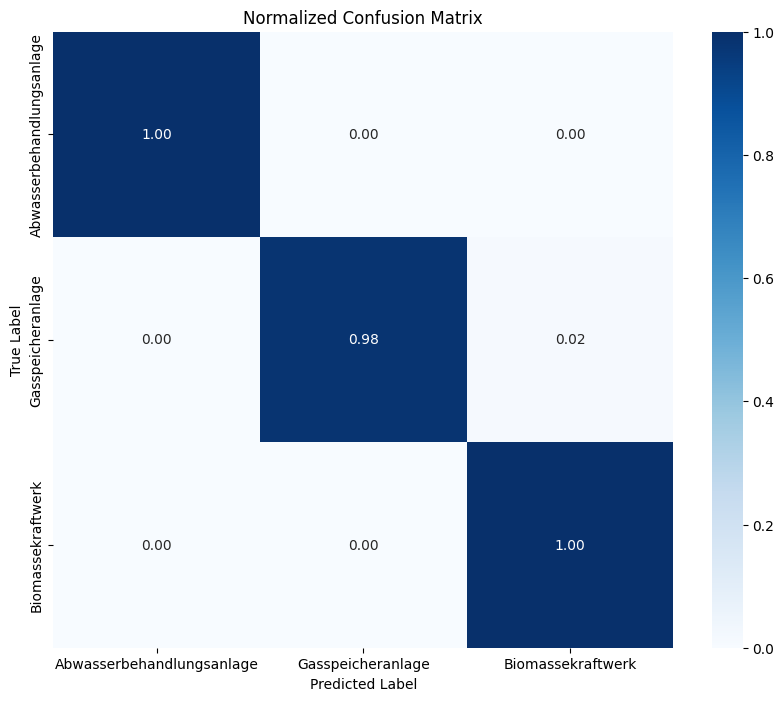

In [7]:
from services.llm_model import plot_confusion_matrix

plot_confusion_matrix(df, fixed_labels=["Abwasserbehandlungsanlage", "Gasspeicheranlage", "Biomassekraftwerk"])